In [ ]:
# Installing Packages
suppressMessages(install.packages("RWeka"))
suppressMessages(install.packages("partykit"))
suppressMessages(install.packages("caTools"))

In [ ]:
suppressMessages(library(RWeka))
suppressMessages(library(partykit))
suppressMessages(library(caTools))
suppressMessages(library(repr))
suppressMessages(library(foreign))

In [ ]:
# Download messidor_features.arff file to /content
download.file('https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff','/content/messidor_features.arff')

In [ ]:
# Load file into variable dataset
dataset = read.arff("./messidor_features.arff")
head(dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,1,22,22,22,19,18,14,49.89576,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
2,1,1,24,24,22,18,16,13,57.70994,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
3,1,1,62,60,59,54,47,33,55.83144,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
4,1,1,55,53,53,50,43,31,40.46723,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
5,1,1,44,44,44,41,39,27,18.02625,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
6,1,1,44,43,41,41,37,29,28.35640,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1


---
#**J48 - Weka Classifier**
---

In [1]:
resultJ48 <- J48(Class~., data = dataset, control = Weka_control(C=.25, M=2))
resultJ48

ERROR: ignored

In [ ]:
evalJ48 <- evaluate_Weka_classifier(resultJ48,numFolds = 10,class = TRUE,seed = 1)
evalJ48

=== 10 Fold Cross Validation ===

=== Summary ===

Correctly Classified Instances         741               64.3788 %
Incorrectly Classified Instances       410               35.6212 %
Kappa statistic                          0.2897
Mean absolute error                      0.3796
Root mean squared error                  0.5125
Relative absolute error                 76.2052 %
Root relative squared error            102.6913 %
Total Number of Instances             1151     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.680    0.388    0.608      0.680    0.642      0.292    0.685     0.614     0
                 0.612    0.320    0.684      0.612    0.646      0.292    0.685     0.694     1
Weighted Avg.    0.644    0.352    0.648      0.644    0.644      0.292    0.685     0.656     

=== Confusion Matrix ===

   a   b   <-- classified as
 367 173 |   a = 0
 237 374 |   b = 1

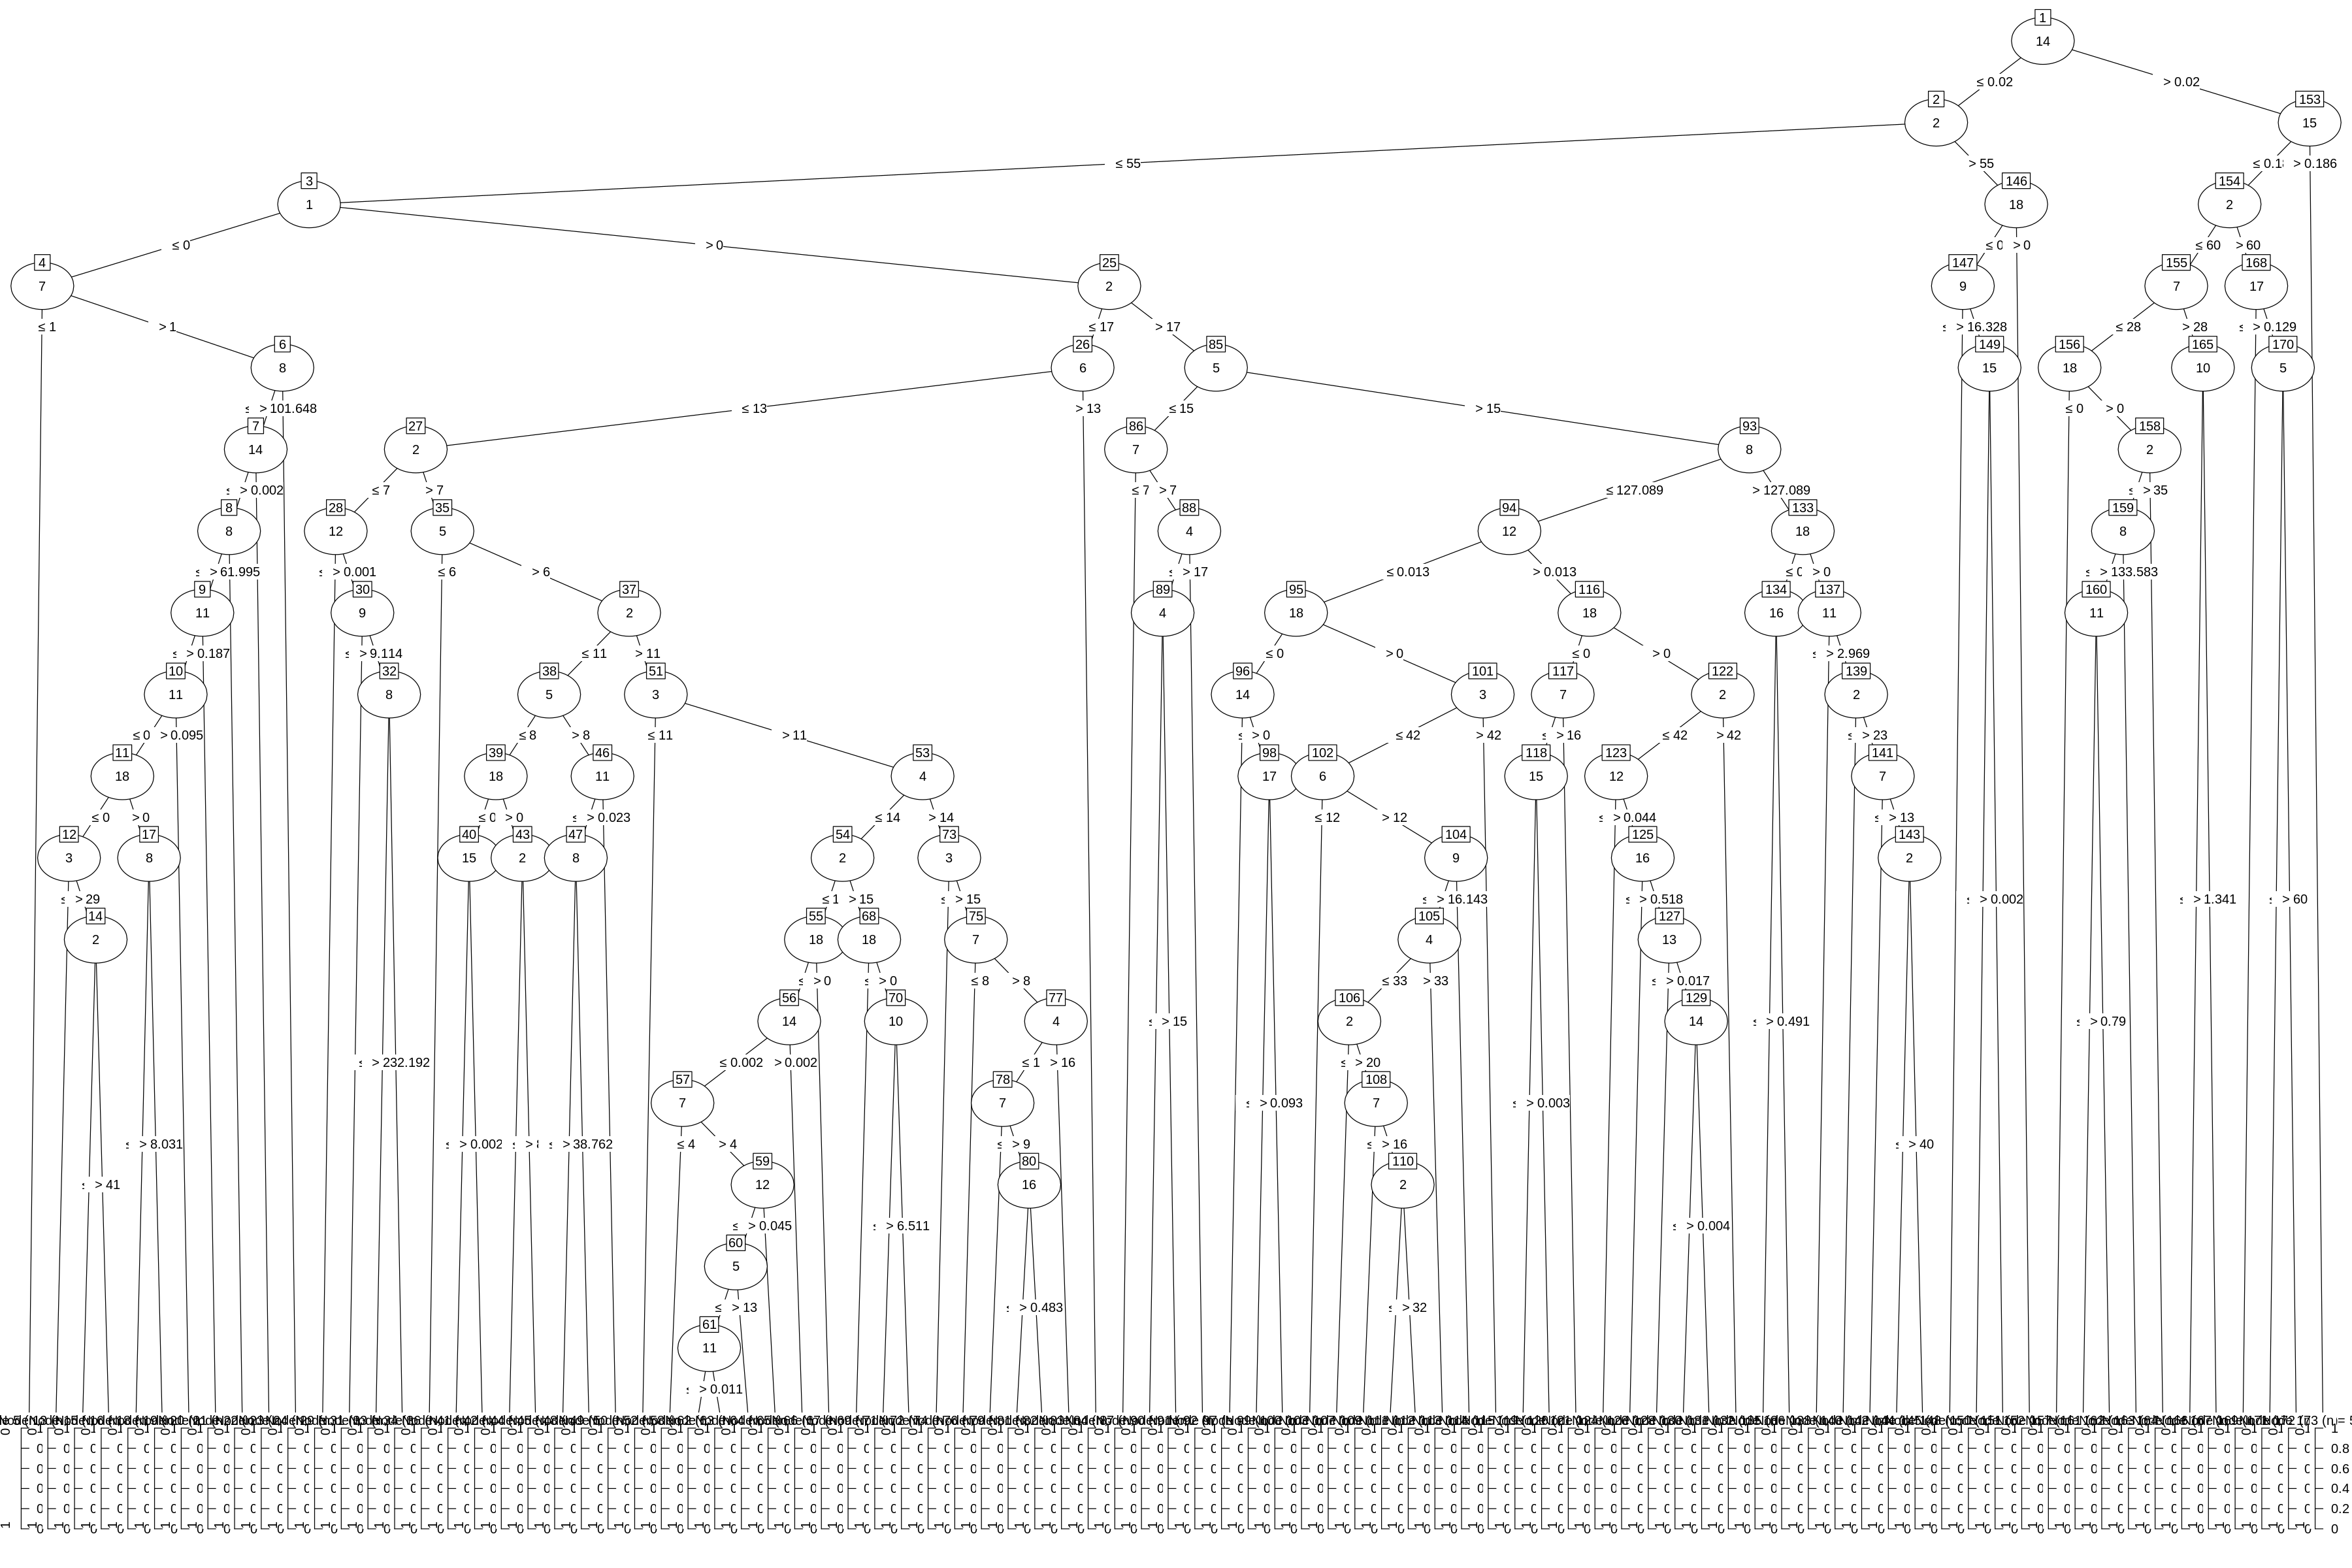

In [ ]:
options(repr.plot.width=30, repr.plot.height=20)
plot(resultJ48)